In [1]:
##### Seaborn
#
# - Seaborn is a library for making statistical graphs in Python. 
# - It is built on top of matplotlib and closely integrates with pandas data structures.
# - Two way to access sns functionality:
#       Figure-level interfaces provide conveniet wrappers for multiple underlying axes-level functions; these return FacetGrid objects
#       Axes-level functions provide more control when combining multiple figures into a single figure; these return axes objects
#
# https://seaborn.pydata.org/
# https://seaborn.pydata.org/introduction.html
# https://seaborn.pydata.org/examples/index.html
#

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

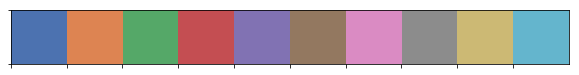

In [4]:
##### setting and checking color palette: deep, muted, pastel, bright, dark, and colorblind
sns.set_palette("deep")
sns.palplot(sns.color_palette()) 

In [5]:
##### load sns sample data sets
# https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
##### categorical
# https://seaborn.pydata.org/tutorial/categorical.html
# figure-level interface: sns.catplot()
#     encompasses axes-level functions: 
#            for scatterplots within categories - stripplot(), swarmplot(), 
#            for distributions of observations within categories  - boxplot(), violinplot(), boxenplot(), 
#            for statistical estimations within categories - pointplot(), barplot(), countplot()

In [9]:
##### scatterplots within categories: 
# Useful for small datasets.
# The main challenge in representing categorical data with a scatter plot is that all of the points 
# belonging to one category would fall on the same position along the axis corresponding to the 
# categorical variable. There are two approaches to resolving this challenge:
# - kind=strip resolves this by adjusting the positions of points on the categorical axis with a 
#    small amount of random “jitter”
# - kind=swarm resolves this by adjusting the points along the categorical axis using an algorithm 
#   that prevents them from overlapping

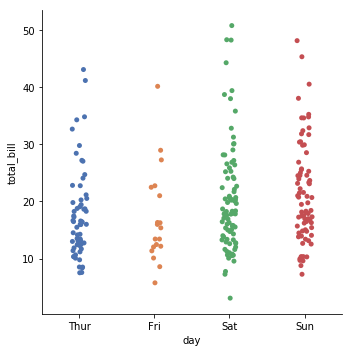

In [10]:
# strip
sns.catplot(data=tips, x='day', y='total_bill', kind='strip') 

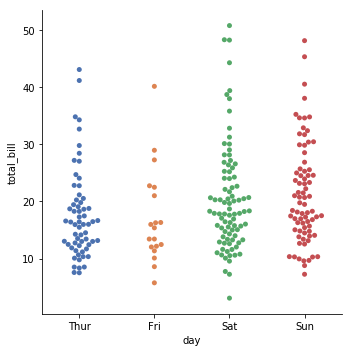

In [11]:
# swarm
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm') 

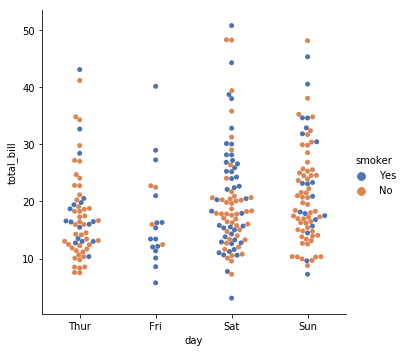

In [12]:
# can use hue to segment data
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='smoker') 

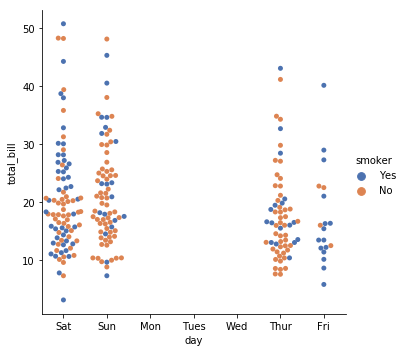

In [13]:
# can change default ordering of categorical data
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='smoker', order=['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri']) 

In [14]:
##### distributions of observations within categories
# As the size of the dataset grows, categorical scatter plots become limited in visualizing the distribution of values within each category. 
# When this happens, we can use one of the following approaches instead.
#  - kind=box: Q1, Q2, Q3,1.5 IQR whiskers, outliers 
#  - kind=violin: provides kerne density estimation

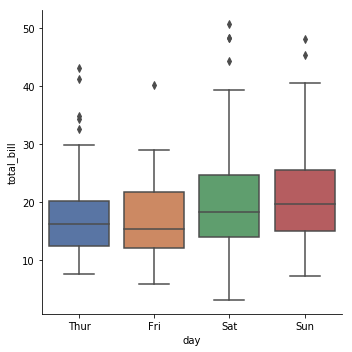

In [15]:
# box
sns.catplot(data=tips, x='day', y='total_bill', kind='box')

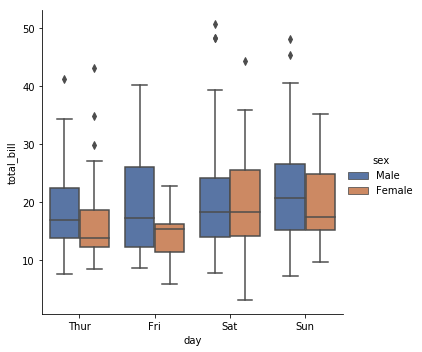

In [16]:
# can use hue
sns.catplot(data=tips, x='day', y='total_bill', kind='box', hue='sex')

D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


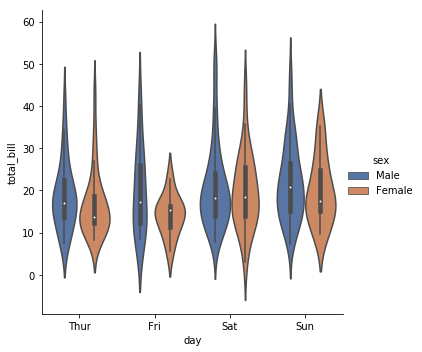

In [22]:
# violin with box
sns.catplot(data=tips, x='day', y='total_bill', kind='violin',hue='sex')

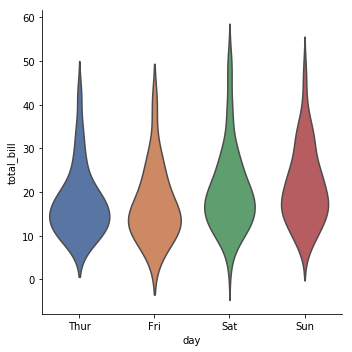

In [26]:
# violin without box
sns.catplot(data=tips, x='day', y='total_bill', kind='violin', inner=None)

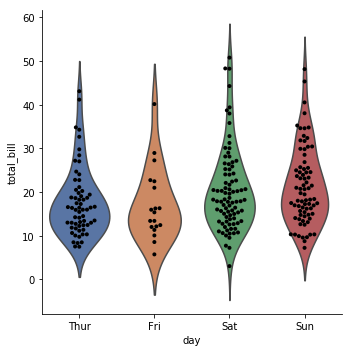

In [30]:
# violin with swarm - we'll directly use the axes-level function swarmplot here
g = sns.catplot(data=tips, x='day', y='total_bill', kind='violin', inner=None)
sns.swarmplot(data=tips, x='day', y='total_bill', color='k', size=4, ax=g.ax)

In [18]:
#### statistical estimation within categories
# For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. 
# We can use one of the following approaches for this.
#  - kind=bar: operates on a full dataset and applies a function to obtain the estimate (taking the mean by default); when there are multiple observations 
#                     in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars
#  - kind=count: when you want to show the number of observations in each category rather than computing a statistic for a second variable;
#                     this is similar to a histogram over a categorical, rather than quantitative, variable
#  - kind=point: like the bar plot, but instead of plotting the full bar, plots the point estimate and confidence interval; additionally, connects points from the 
#                     same hue category, makgin it easier to see how the main relationship is changing as a function of the hue semantic

D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


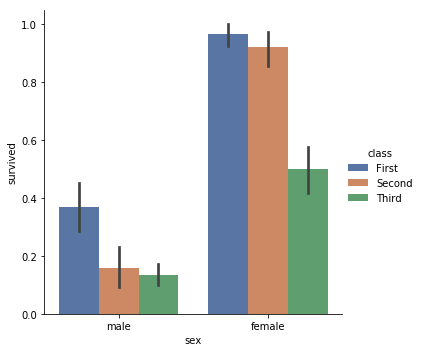

In [31]:
# bar plot
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='bar');

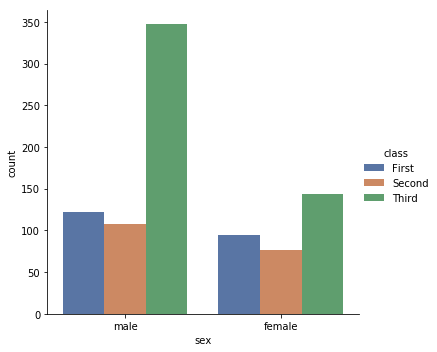

In [33]:
# count plot
sns.catplot(data=titanic, x='sex', hue='class', kind='count');

D:\Users\herma\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


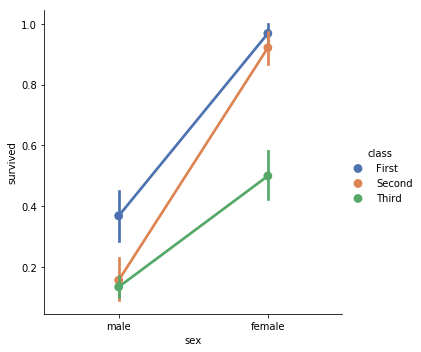

In [35]:
# point plot
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='point');

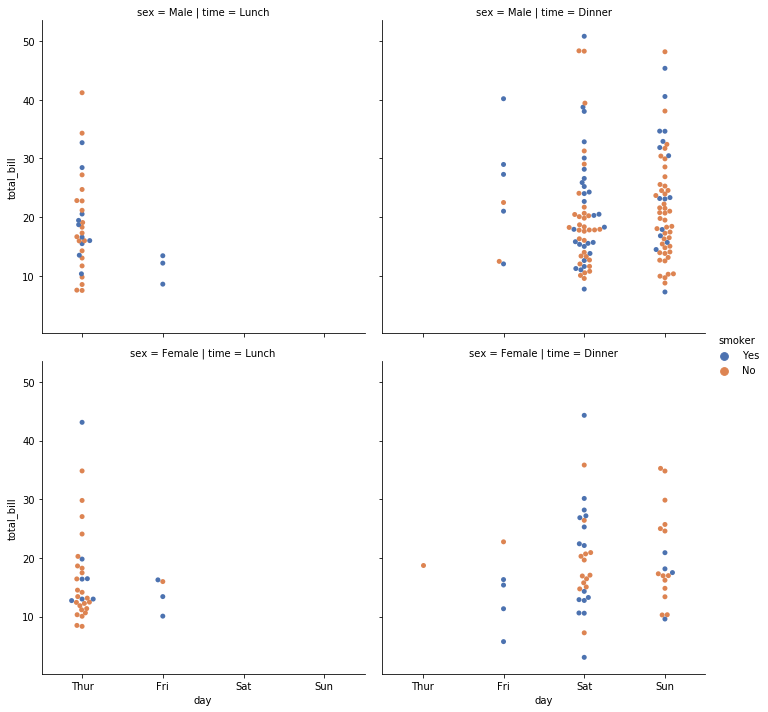

In [36]:
# showing multiple relationships with facets: make multiple axes and plot subsets of the data on each of them
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='smoker', row="sex", col="time", height=5, aspect=1) 